<a href="https://colab.research.google.com/github/snehagandla30/Oasis-Infobyte/blob/main/Wine_Quality_Predicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving WineQT.csv to WineQT.csv


dataset loaded successfully!
Shape: 1143 rows x 13columns


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4



Missing Values per Column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Removed 0 duplicate rows.

Descriptive Statistics:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


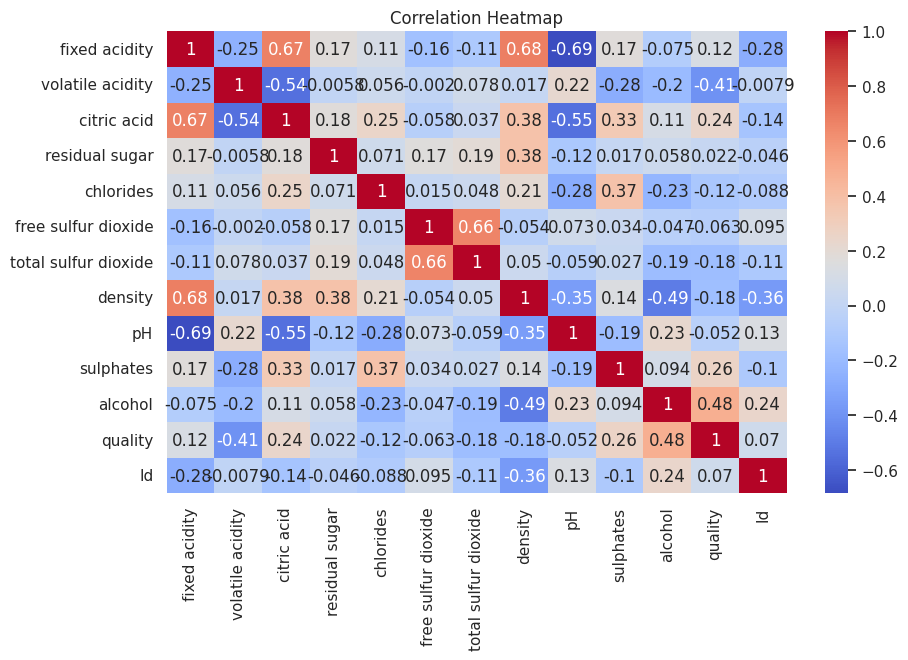

/tmp/ipython-input-1812323859.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='Set2')


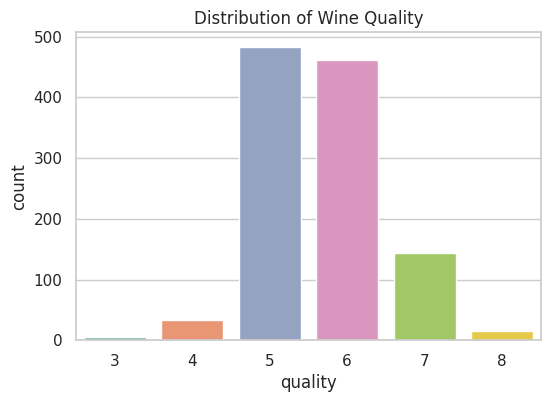

/tmp/ipython-input-1812323859.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=df, palette='viridis')


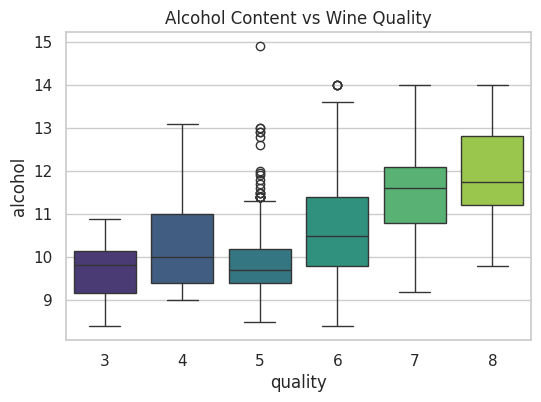


 Preparing data for modeling...

Training Logistic Regression...
Training Random Forest
Training SVM

 Model Comparison:


,Model,Accuracy
1,Random Forest,0.803493
2,SVM,0.786026
0,Logisic Regression,0.777293


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn. ensemble import RandomForestClassifier
from sklearn.svm import SVC
sns.set(style="whitegrid")

# Step 1: Load Dataset
file_name = "WineQT.csv"
df = pd.read_csv(file_name)

print("dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows x {df.shape[1]}columns")
display(df.head())

# Step 2: Basic Info & Cleaning

print("\nMissing Values per Column:")
print(df.isna().sum())

df.fillna(df.median(numeric_only=True), inplace=True)

before = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"\nRemoved {before - df.shape[0]} duplicate rows.")

# Step 3: EDA

print("\nDescriptive Statistics:")
display(df.describe())

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='quality', data=df, palette='Set2')
plt.title("Distribution of Wine Quality")
plt.show()


if 'alcohol' in df.columns and 'quality' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='quality', y='alcohol', data=df, palette='viridis')
    plt.title("Alcohol Content vs Wine Quality")
    plt.show()


# Step 4: Data Preparation

print("\n Preparing data for modeling...")

X = df.drop(columns=['quality'])
y = df['quality']


y_class = y.apply(lambda q: 1 if q > 5 else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42, stratify=y_class)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 5: Model Training & Evaluation

print("\nTraining Logistic Regression...")
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
acc_lr = accuracy_score(y_test, y_pred_lr)

print("Training Random Forest")
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("Training SVM")
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
acc_svm = accuracy_score(y_test, y_pred_svm)

# Step 6: Results Comparision

results = pd.DataFrame({"Model": ["Logisic Regression", "Random Forest", "SVM"], "Accuracy":[acc_lr, acc_rf, acc_svm]})

print("\n Model Comparison:")
display(results.sort_values(by='Accuracy', ascending=False))